## Some plots of the output

Spectra, percentiles (real and predicted) and some components of the latents

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['font.size'] = 40
mpl.rcParams["figure.figsize"] = (15,10)

In [4]:
#linear-exp SFHs
wave=np.load('./saved_input/waves.npy')
ind_sh=np.load('./saved_model/ind_sh.npy')
x_test=np.load('../../seds_large/seds_10000.npy',allow_pickle=True)[ind_sh,:][9000:,]
y_test=np.load('./saved_model/y_test.npy',allow_pickle=True)
ys_=np.load('./saved_model/y_test_pred.npy',allow_pickle=True)
latents=np.load('./saved_model/latents.npy',allow_pickle=True)
print(np.shape(y_test),np.shape(ys_),np.shape(latents))

"""#non-parametric SFHs from dense_basis

wave=np.load('../non_parametric_sfh/input/wave_1e5_non_par.npy')
ind_sh=np.load('../non_parametric_sfh/input/ind_sh_1e5.npy')
seds=np.load('../../seds_large/non_parametric_sfh/seds_1e5_non_par.npy')[ind_sh,:][90000:,:]
x_test=seds
y_test=np.load('../non_parametric_sfh/saved_models/y_test.npy',allow_pickle=True)
ys_=np.load('../non_parametric_sfh/saved_models/y_test_pred.npy',allow_pickle=True)
latents=np.load('../non_parametric_sfh/saved_models/latents.npy',allow_pickle=True)
print(np.shape(y_test),np.shape(ys_),np.shape(latents))
"""

(8,) (8,) (8,)


"#non-parametric SFHs from dense_basis\n\nwave=np.load('../non_parametric_sfh/input/wave_1e5_non_par.npy')\nind_sh=np.load('../non_parametric_sfh/input/ind_sh_1e5.npy')\nseds=np.load('../../seds_large/non_parametric_sfh/seds_1e5_non_par.npy')[ind_sh,:][90000:,:]\n"

Index 118
Index 14
Index 91
Index 126
Index 111
Index 74
Index 45
Index 83
Index 121
Index 117


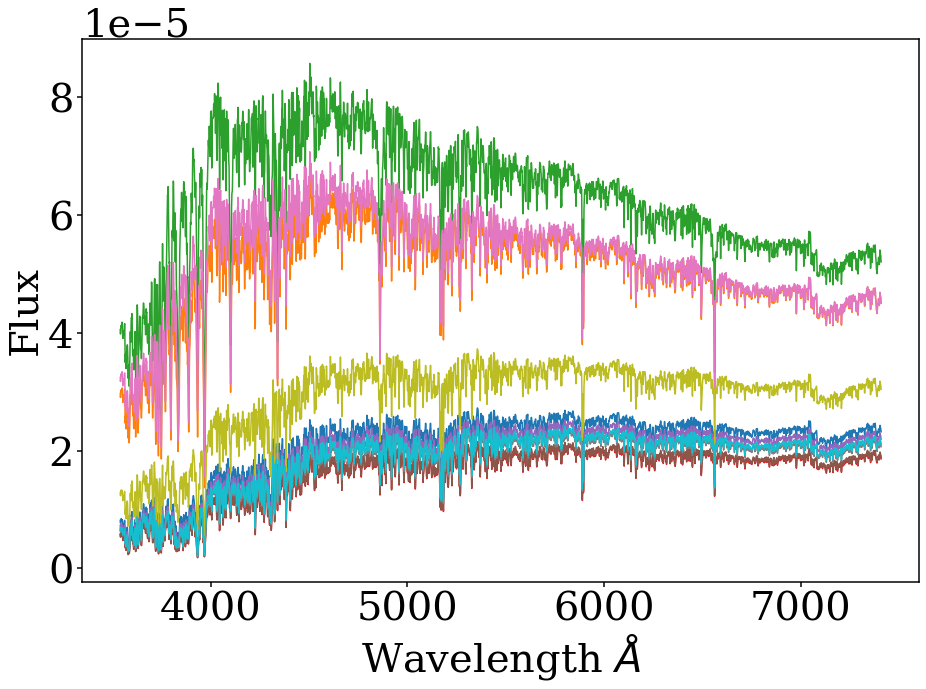

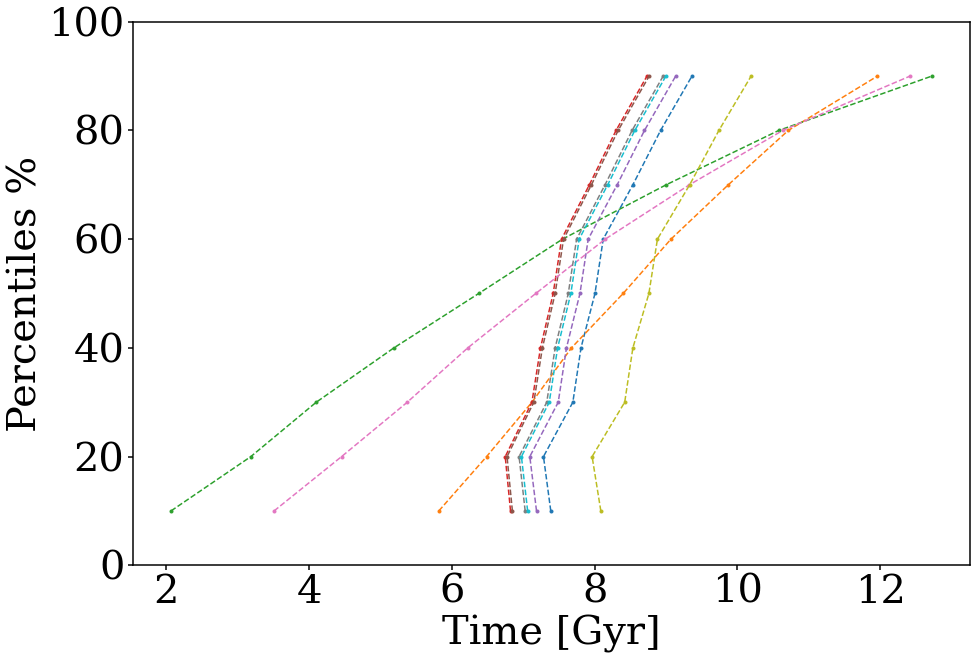

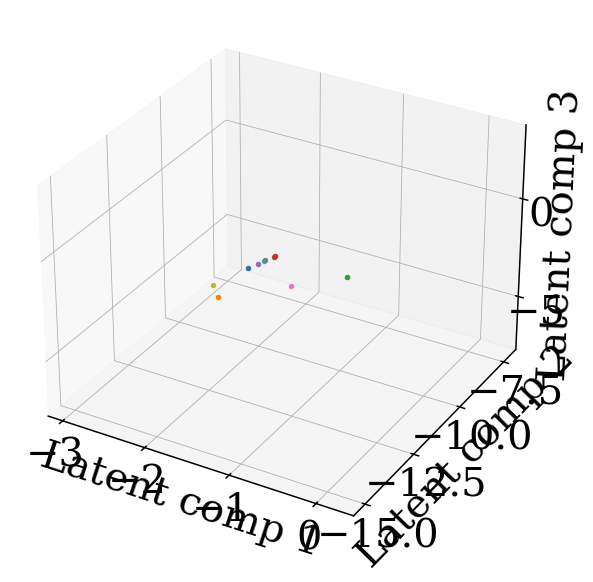

In [7]:
ind=np.random.choice(np.arange(128),size=10)
color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#999 works pretty well
#spectrum
for i,index in enumerate(ind):
    print('Index '+str(index))
    plt.plot(wave,x_test[index,:],color=color[i])
plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.show()

#percentiles vs time
for i,index in enumerate(ind):
    #plt.plot(y_test[0][index,:],np.arange(10,100,10),'.-',label='real',color=color[i])
    plt.plot(ys_[0][index,:],np.arange(10,100,10),'.--',label='predicted',color=color[i])
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
#plt.xlim(0,14)

plt.ylim(0,100)
#plt.legend()
plt.show()


#latent space (1,2,3)
plt.figure()
ax = plt.axes(projection='3d')
for i,index in enumerate(ind):
    ax.scatter3D(latents[0][index,4],latents[0][index,5],latents[0][index,6],color=color[i])
ax.set_xlabel('Latent comp 1')
ax.set_ylabel('Latent comp 2')
ax.set_zlabel('Latent comp 3')
#ax.view_init(20, 10)
plt.show()

#predicts bad the 'young population'


## Embedding the latents

We need to visualize better percentiles. We use the UMAP tool.

In [8]:


batch_size=128
test_set=1000

percent_pred_arr=np.zeros((test_set,9))
latents_arr=np.zeros((test_set,16))
percent_arr=np.zeros((test_set,9))


for j in range(len(ys_)):
    for i,x in enumerate(ys_[j]):
        percent_pred_arr[batch_size*j+i,:]=x
        
for j in range(len(latents)):
    for i,x in enumerate(latents[j]):
        latents_arr[batch_size*j+i,:]=x
        
for j in range(len(y_test)):
    for i,x in enumerate(y_test[j]):
        percent_arr[batch_size*j+i,:]=x
        
        
        
ys_=percent_pred_arr
latents=latents_arr
y_test=percent_arr

In [9]:
print(np.shape(latents))

(1000, 16)


In [13]:
!pip uninstall umap-learn
"""import umap.umap_ as umap
reducer = umap.UMAP()
embed = reducer.fit_transform(latents) #train each time, if not, just transform
"""

Found existing installation: umap-learn 0.5.3
Uninstalling umap-learn-0.5.3:
  Would remove:
    /home/pin-ext/.local/lib/python3.8/site-packages/umap/*
    /home/pin-ext/.local/lib/python3.8/site-packages/umap_learn-0.5.3.dist-info/*
  Would not remove (might be manually added):
    /home/pin-ext/.local/lib/python3.8/site-packages/umap/__pycache__/layouts.rdist-30.py38.1.nbc
    /home/pin-ext/.local/lib/python3.8/site-packages/umap/__pycache__/layouts.rdist-30.py38.nbi
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


'import umap.umap_ as umap\nreducer = umap.UMAP()\nembed = reducer.fit_transform(latents) #train each time, if not, just transform\n'

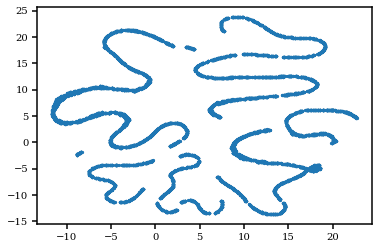

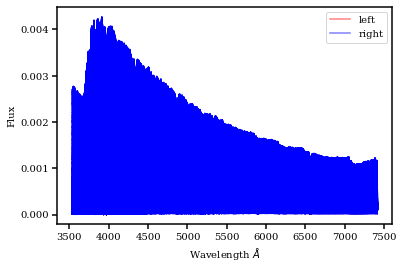

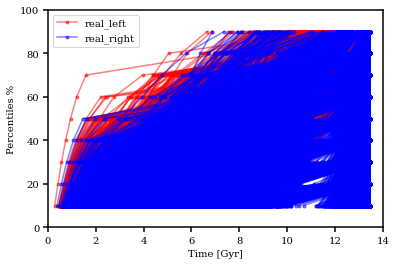

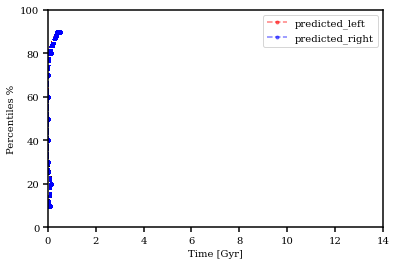

In [21]:
# no coloring
plt.scatter(embed[:,0], embed[:,1], s=5, c='tab:blue', rasterized=True)
plt.show()

#left vs right division : we see mainly due to new stars (recent SF) vs old stars (old SF)

left=np.where(embed[:,0]<0)[0]
right=np.where(embed[:,0]>2.5)[0]

#left=[np.argmax(embed[left,0])]
#right=[np.argmin(embed[right,0])]

for l in left:
    if l==left[0]:
        plt.plot(wave,x_test[l,:],color='r',label='left',alpha=0.5)
    else:
        plt.plot(wave,x_test[l,:],color='r',alpha=0.5)
#plt.show()        
for r in right:
    if r==right[0]:
        plt.plot(wave,x_test[r,:],color='b',label='right',alpha=0.5)
    else:
        plt.plot(wave,x_test[r,:],color='b',alpha=0.5)
        

plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()


for l in left:
    if l==left[0]:
        plt.plot(y_test[l,:],np.arange(10,100,10),'.-',label='real_left',color='r',alpha=0.5)
    else:
        plt.plot(y_test[l,:],np.arange(10,100,10),'.-',color='r',alpha=0.5)
#plt.show()        
for r in right:
    if r==right[0]:
        plt.plot(y_test[r,:],np.arange(10,100,10),'.-',label='real_right',color='b',alpha=0.5)
    else:
        plt.plot(y_test[r,:],np.arange(10,100,10),'.-',color='b',alpha=0.5)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()


for l in left:
    if l==left[0]:
        plt.plot(ys_[l,:],np.arange(10,100,10),'.--',label='predicted_left',color='r',alpha=0.5)
    else:
        plt.plot(ys_[l,:],np.arange(10,100,10),'.--',color='r',alpha=0.5)
    
#plt.show()
for r in right:
    if r==right[0]:
        plt.plot(ys_[r,:],np.arange(10,100,10),'.--',label='predicted_right',color='b',alpha=0.5)
    else:
        plt.plot(ys_[r,:],np.arange(10,100,10),'.--',color='b',alpha=0.5)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()



In [ ]:
#top versus bottom division (inside right): not clear! maybe a specific region?
embed_r=embed[right,:]

#restricting even more the x axis, to avoid more bottom points at the left
embed_r=embed_r[np.where(embed_r[:,0]>7.5)[0],:] 

bottom=np.where(embed_r[:,1]<10)[0]
top=np.where(embed_r[:,1]>10)[0]

#keeping just the right points
x_test_r=x_test[right,:]
y_test_r=y_test[0][right,:]
y_test_pred_r=ys_[0][right,:]

print(np.shape(bottom),np.shape(top))


for b in bottom:
    if b==bottom[0]:
        plt.plot(wave,x_test_r[b,:],color='r',label='bottom',alpha=0.1)
    else:
        plt.plot(wave,x_test_r[b,:],color='r',alpha=0.1)
        
for t in top:
    if t==top[0]:
        plt.plot(wave,x_test_r[t,:],color='b',label='top',alpha=0.1)
    else:
        plt.plot(wave,x_test_r[t,:],color='b',alpha=0.1)
        
    


plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()


for b in bottom:
    if b==bottom[0]:
        plt.plot(y_test_r[b,:],np.arange(10,100,10),'.-',label='real_bottom',color='r',alpha=0.1)
    else:
        plt.plot(y_test_r[b,:],np.arange(10,100,10),'.-',color='r',alpha=0.1)
       
for t in top:
    if t==top[0]:
        plt.plot(y_test_r[t,:],np.arange(10,100,10),'.-',label='real_top',color='b',alpha=0.1)
    else:
        plt.plot(y_test_r[t,:],np.arange(10,100,10),'.-',color='b',alpha=0.1)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
plt.xlim(0,14)
plt.ylim(0,100)
plt.legend()
plt.show()

for b in bottom:
    if b==bottom[0]:
        plt.plot(y_test_pred_r[b,:],np.arange(10,100,10),'.--',label='pred_bottom',color='r',alpha=0.1)
    else:
        plt.plot(y_test_pred_r[b,:],np.arange(10,100,10),'.--',color='r',alpha=0.1)
#plt.show()      
for t in top:
    if t==top[0]:
        plt.plot(y_test_pred_r[t,:],np.arange(10,100,10),'.--',label='pred_top',color='b',alpha=0.1)
    else:
        plt.plot(y_test_pred_r[t,:],np.arange(10,100,10),'.--',color='b',alpha=0.1)
        
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
#plt.xlim(0,14)
#plt.ylim(0,100)
plt.legend()
plt.show()



In [22]:
#which is the shape of the actual seds (no latents) - maybe too much dimensions to represent, but let's see

embed_sed = reducer.fit_transform(x_test)


(10000, 2)


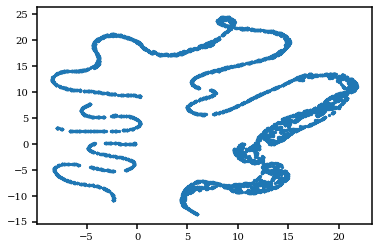

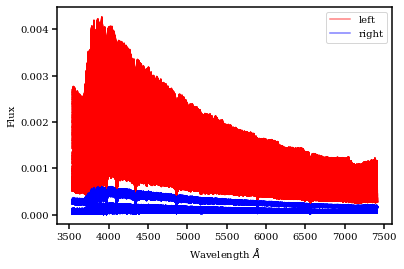

In [23]:
print(np.shape(embed_sed))
plt.scatter(embed_sed[:,0], embed_sed[:,1], s=5, c='tab:blue', rasterized=True)
plt.show()

left=np.where(embed_sed[:,0]<0)[0]
right=np.where(embed_sed[:,0]>10)[0]

for l in left:
    if l==left[0]:
        plt.plot(wave,x_test[l,:],color='r',label='left',alpha=0.5)
    else:
        plt.plot(wave,x_test[l,:],color='r',alpha=0.5)
      
for r in right:
    if r==right[0]:
        plt.plot(wave,x_test[r,:],color='b',label='right',alpha=0.5)
    else:
        plt.plot(wave,x_test[r,:],color='b',alpha=0.5)
        

plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.legend()
plt.show()



## Halpha

/var/folders/26/90klcxjd1_x9q0l8mz3tx1g00000gn/T/ipykernel_19264/2321756753.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')


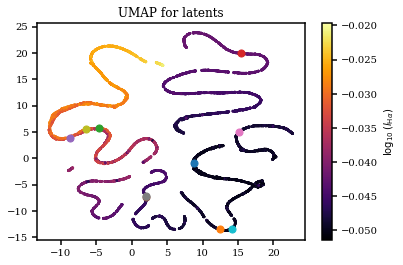

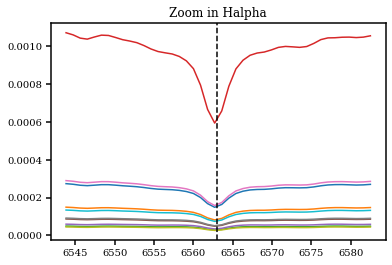

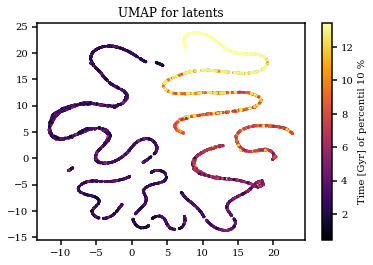

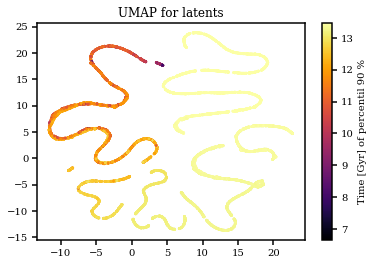

In [25]:
#lets try to see the dependance of the UMAP for latents with halpha

# Halpha

def l(l_center=6563,delta=20):
    sel = (wave > l_center-delta) & (wave < l_center+delta)
    diff = x_test[:,sel]
    #print(np.shape(diff),np.shape(np.sum(diff,axis=1)),np.shape(np.median(x_test,axis=1)))
    #return np.sum(diff,axis=1)/np.median(x_test,axis=1)
    #return np.sum(diff,axis=1)/np.max(x_test,axis=1)
    near=(wave > l_center-200) & (wave < l_center+200)
    return np.mean(diff,axis=1) / np.median(x_test[:,near],axis=1)

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=6563))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{\mathrm{H}\alpha})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 6543) & (wave < 6583)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(6563,0,1,ls='--',c='k')
plt.title('Zoom in Halpha')
plt.show()

#lets try to see the dependance with time percentile 10% (a bit random)
plt.scatter(embed[:,0], embed[:,1], s=3, c=y_test[:,1], rasterized=True, cmap='inferno')
plt.colorbar(label='Time [Gyr] of percentil 10 %')
plt.title('UMAP for latents')
plt.show()

#lets try to see the dependance with time percentile 90% (as expected from the seds)
#galaxies from the right formed all their stars soon

plt.scatter(embed[:,0], embed[:,1], s=3, c=y_test[:,-1], rasterized=True, cmap='inferno')
plt.colorbar(label='Time [Gyr] of percentil 90 %')
plt.title('UMAP for latents')
plt.show()


## Hbeta

/var/folders/26/90klcxjd1_x9q0l8mz3tx1g00000gn/T/ipykernel_19264/929989099.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')


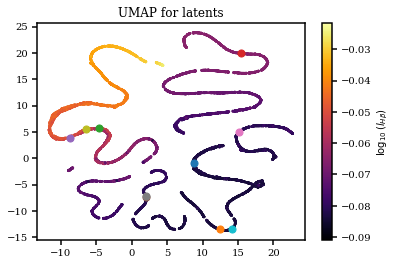

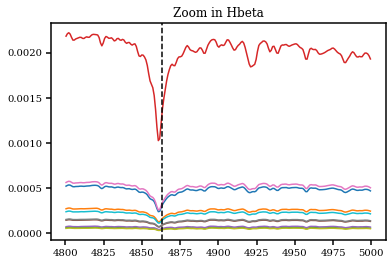

In [26]:
#lets try to see the dependance of the UMAP for latents with Hbeta

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=4863))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{H \beta})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 4800 ) & (wave < 5000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(4863,0,1,ls='--',c='k')
plt.title('Zoom in Hbeta')
plt.show()

## OII

/var/folders/26/90klcxjd1_x9q0l8mz3tx1g00000gn/T/ipykernel_19264/3686336404.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')


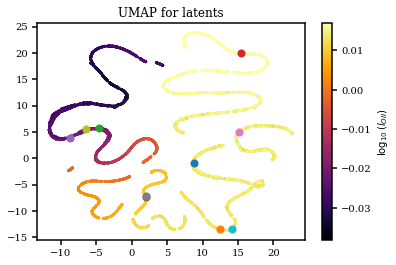

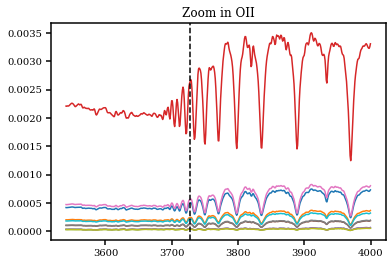

In [27]:
#lets try to see the dependance of the UMAP for latents with OII

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=3, c=np.log10(np.maximum(1e-2,l(l_center=3727))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{OII})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,1000,100)):
    plt.scatter(embed[ind,0], embed[ind,1], s=50, c=color[i], rasterized=True, cmap='inferno')
plt.show()


sel = (wave > 3000 ) & (wave < 4000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,1000,100)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(3727,0,1,ls='--',c='k')
plt.title('Zoom in OII')
plt.show()

## p50%

Text(0.5, 1.0, 'UMAP for latents')

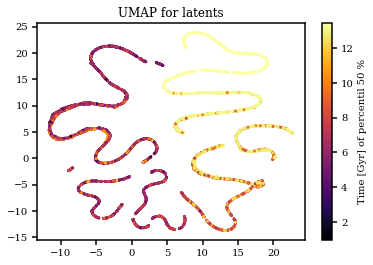

In [28]:
plt.scatter(embed[:,0], embed[:,1], s=3, c=y_test[:,4], rasterized=True, cmap='inferno')
plt.colorbar(label='Time [Gyr] of percentil 50 %')
plt.title('UMAP for latents')

## Correlation between latents and spectrum regions

           1         2         3         4         5         6         7  \
1   1.000000  0.994234  0.449657  0.030596  0.659394 -0.205115  0.576735   
2   0.994234  1.000000  0.353529  0.135602  0.734243 -0.307302  0.659578   
3   0.449657  0.353529  1.000000 -0.878664 -0.374965  0.780336 -0.469741   
4   0.030596  0.135602 -0.878664  1.000000  0.771147 -0.984009  0.834120   
5   0.659394  0.734243 -0.374965  0.771147  1.000000 -0.869396  0.993791   
6  -0.205115 -0.307302  0.780336 -0.984009 -0.869396  1.000000 -0.917636   
7   0.576735  0.659578 -0.469741  0.834120  0.993791 -0.917636  1.000000   
8   0.866623  0.809629  0.835239 -0.471654  0.196395  0.309141  0.092921   
9  -0.894304 -0.936731 -0.007943 -0.470387 -0.921110  0.618952 -0.878401   
10 -0.547849 -0.633166  0.499383 -0.852432 -0.988663  0.931128 -0.999205   
11  0.655007  0.572316  0.969390 -0.734644 -0.136128  0.603368 -0.238702   
12 -0.967309 -0.988779 -0.209956 -0.282043 -0.827104  0.446002 -0.764429   
13 -0.793158

<AxesSubplot:>

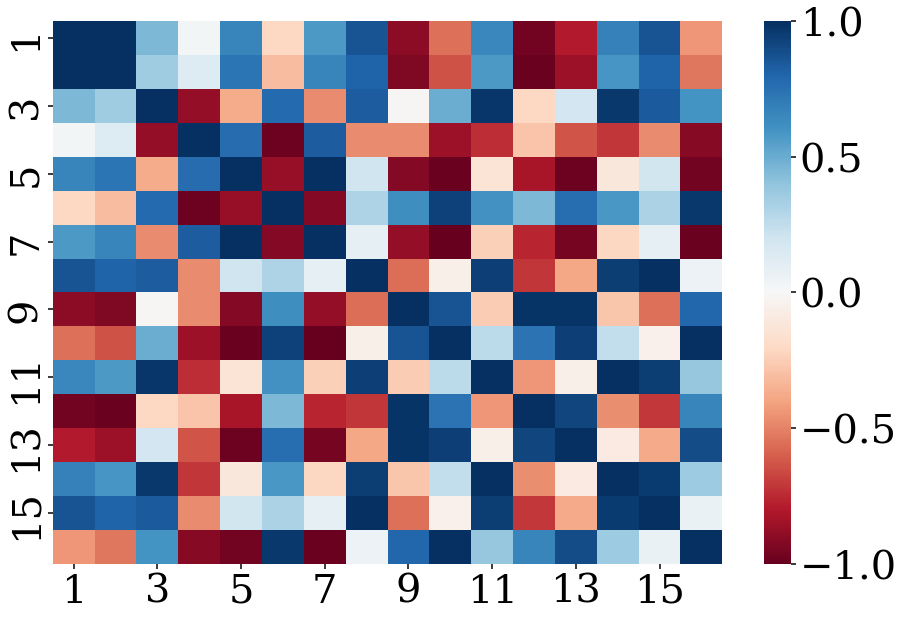

In [14]:
#first correlations inside the latents

import pandas as pd
import seaborn as sns

latents_short=latents[:,:]
latent_data=pd.DataFrame(latents_short, columns = [str(i) for i in range(1,17)])
corr = latent_data.corr()
print(corr)
sns.heatmap(corr, cmap='RdBu',vmin=-1, vmax=1)

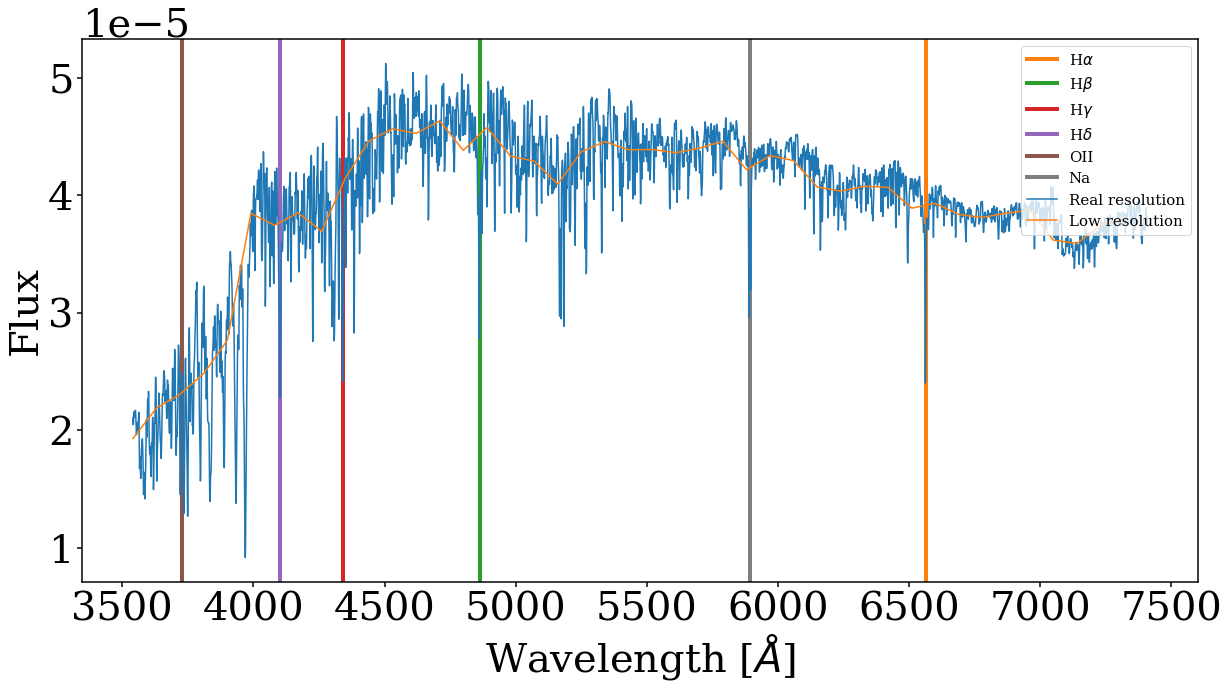

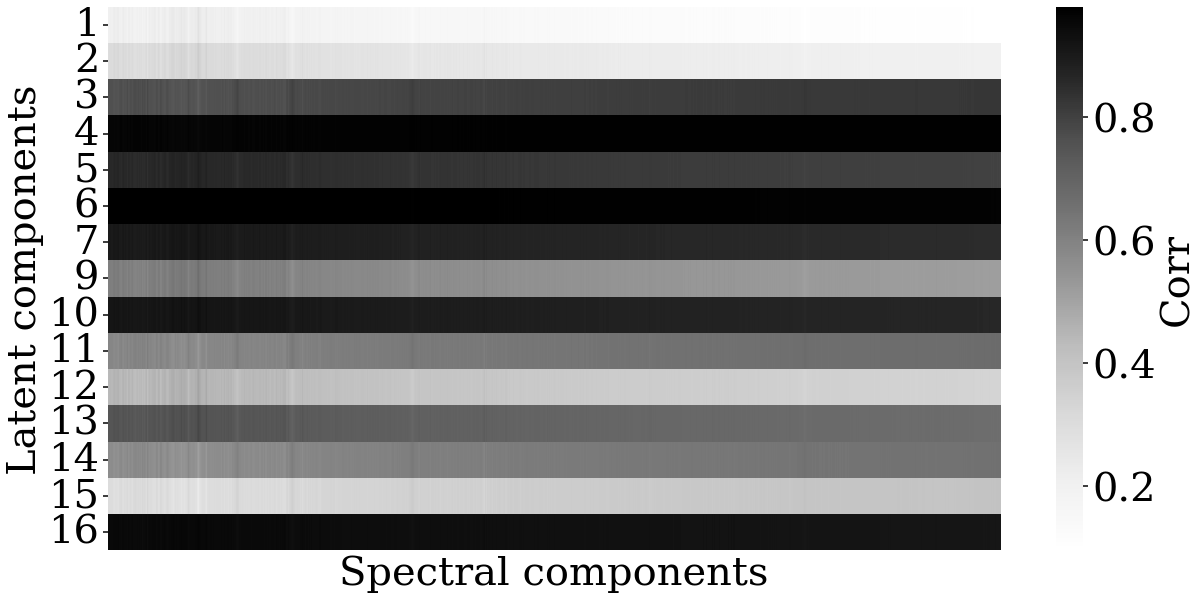

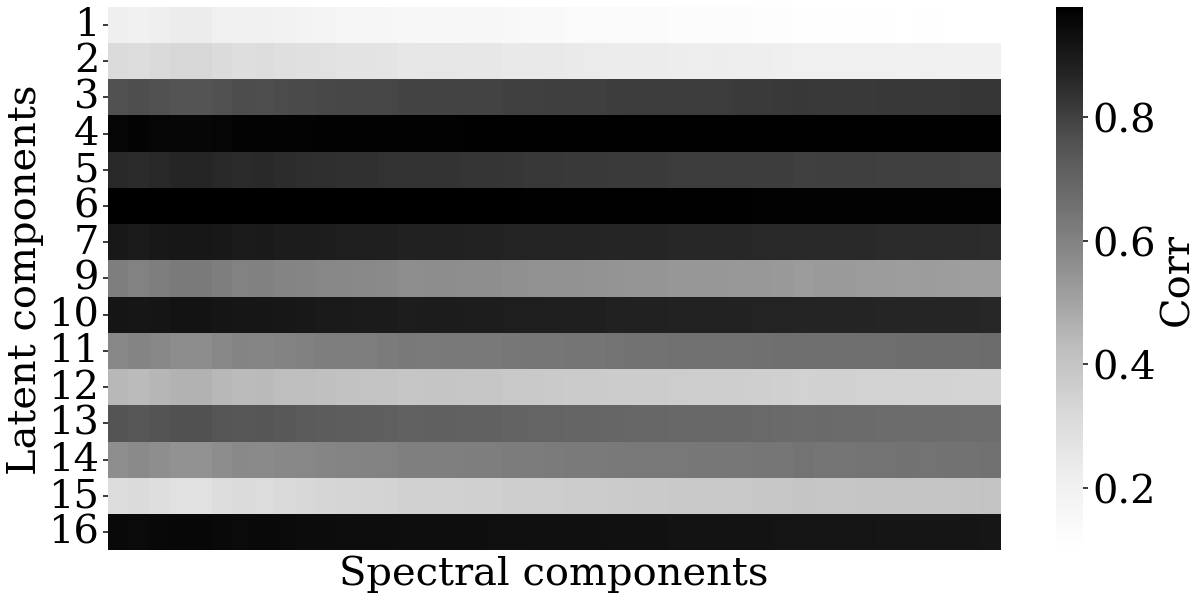

In [16]:
# correlation between latents and spectrum

import matplotlib

x_test_short=np.zeros((1000,43))


for i in range(43):
    x_test_short[:,i]=np.mean(x_test[:,i*100:(i+1)*100],axis=1)

color=['tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


plt.figure(figsize=(20,10))
#plt.xticks(np.arange(4300)[::200],labels=wave[::200],rotation=45)
plt.axvline( 6564.61,label='H$\\alpha$',lw=4,c=color[0])
plt.axvline(  4862.68,label='H$\\beta$',lw=4,c=color[1])
plt.axvline(4341.68,label='H$\\gamma$',lw=4,c=color[2])
plt.axvline(4102.89,label='H$\\delta$',lw=4,c=color[3])
plt.axvline(3727.092,label='OII',lw=4,c=color[4])
#plt.axvline(3729.875,lw=4,c=color[5]) #label='OII'
plt.axvline(5895.6,label='Na',lw=4,c=color[6])



plt.plot(wave,x_test[100,:],label='Real resolution') #real spectra
plt.plot(wave[::100],x_test_short[100,:],label='Low resolution') #low resolution spectra
plt.xlabel('Wavelength [$\\AA$]')
plt.ylabel('Flux')
#plt.grid()

plt.legend(loc='upper right',fontsize=15)
#plt.savefig('spectra_example.png')
plt.show()



corr_map=np.corrcoef(latents,x_test,rowvar=False)
corr_map_imp=corr_map[:16,16:]

#remove component 7 (anormal values)
corr_map_imp = np.delete(corr_map_imp, 7, axis=0)


#doesnt matter the sign of the correlation
plt.figure(figsize=(20,10))
sns.heatmap(np.abs(corr_map_imp), cmap='Greys',vmin=np.min(np.abs(corr_map_imp)), vmax=np.max(np.abs(corr_map_imp)),xticklabels=[],\
            yticklabels=[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16],cbar_kws={'label': 'Corr'})
plt.xlabel('Spectral components')
plt.ylabel('Latent components')
#plt.savefig('corr_spectra_allpos_smooth.png')
plt.show()





corr_map=np.corrcoef(latents,x_test_short,rowvar=False)
corr_map_imp=corr_map[:16,16:]
#remove component 7 (anormal values)
corr_map_imp = np.delete(corr_map_imp, 7, axis=0)


#doesnt matter the sign of the correlation
plt.figure(figsize=(20,10))
sns.heatmap(np.abs(corr_map_imp), cmap='Greys',vmin=np.min(np.abs(corr_map_imp)), vmax=np.max(np.abs(corr_map_imp)),xticklabels=[],\
            yticklabels=[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16],cbar_kws={'label': 'Corr'})
plt.xlabel('Spectral components')
plt.ylabel('Latent components')
plt.savefig('corr_spectra_allpos.png')
plt.show()







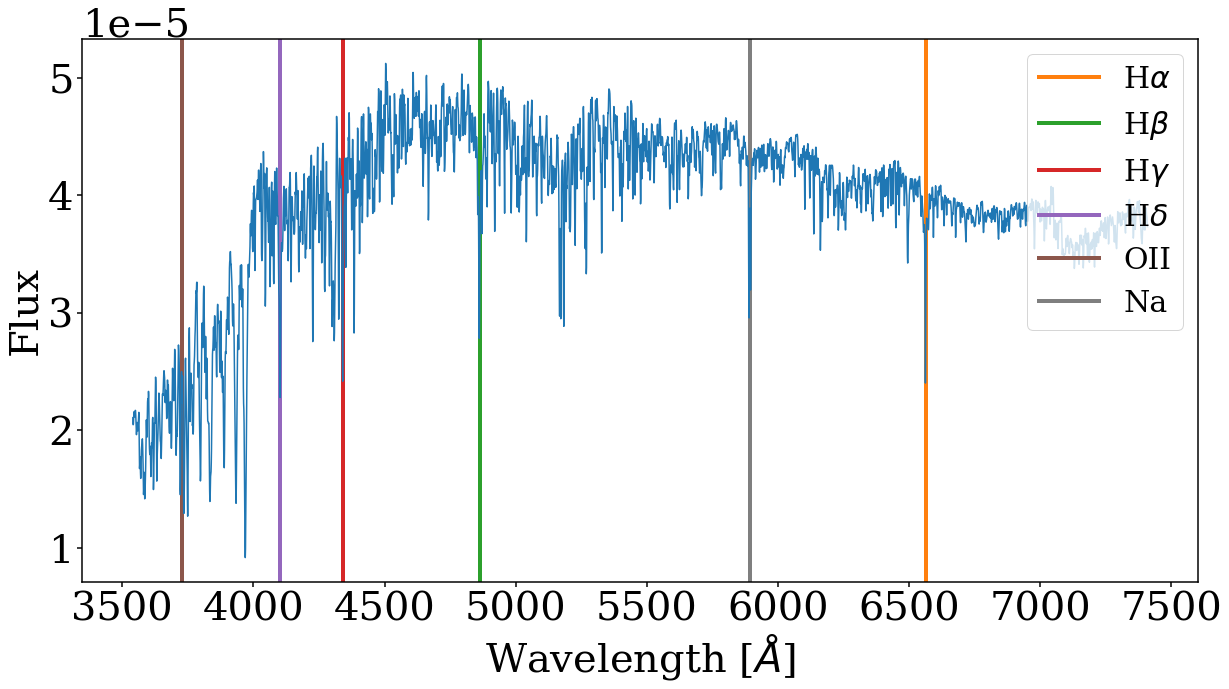

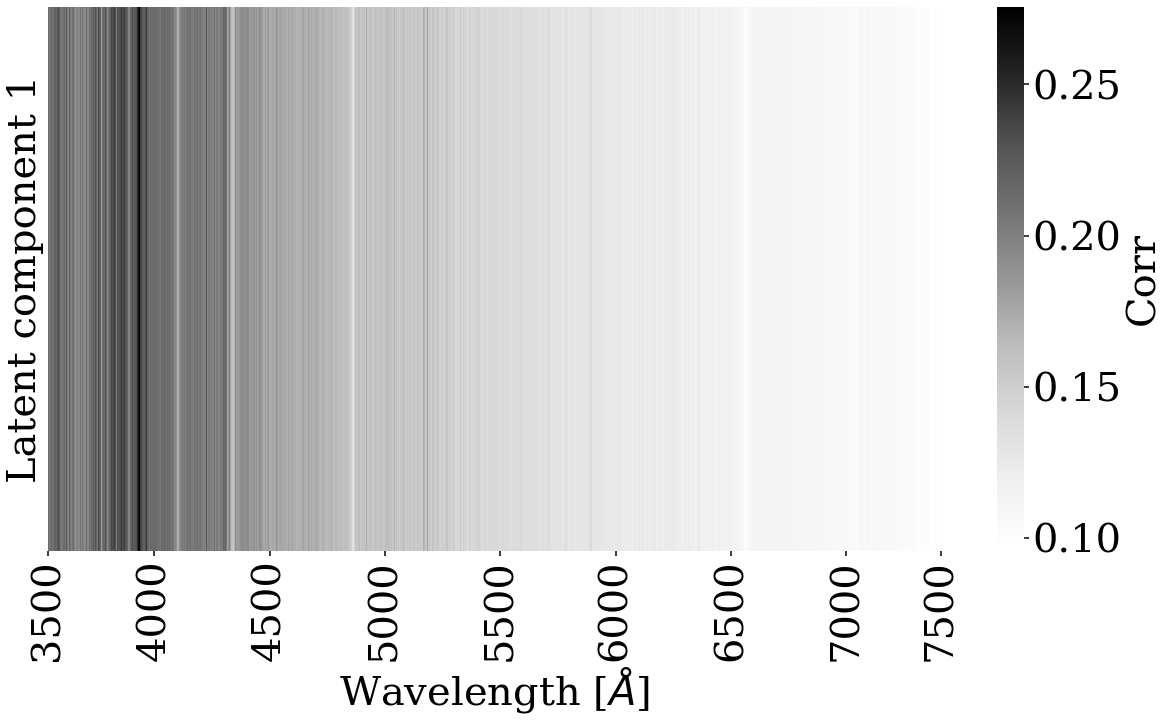

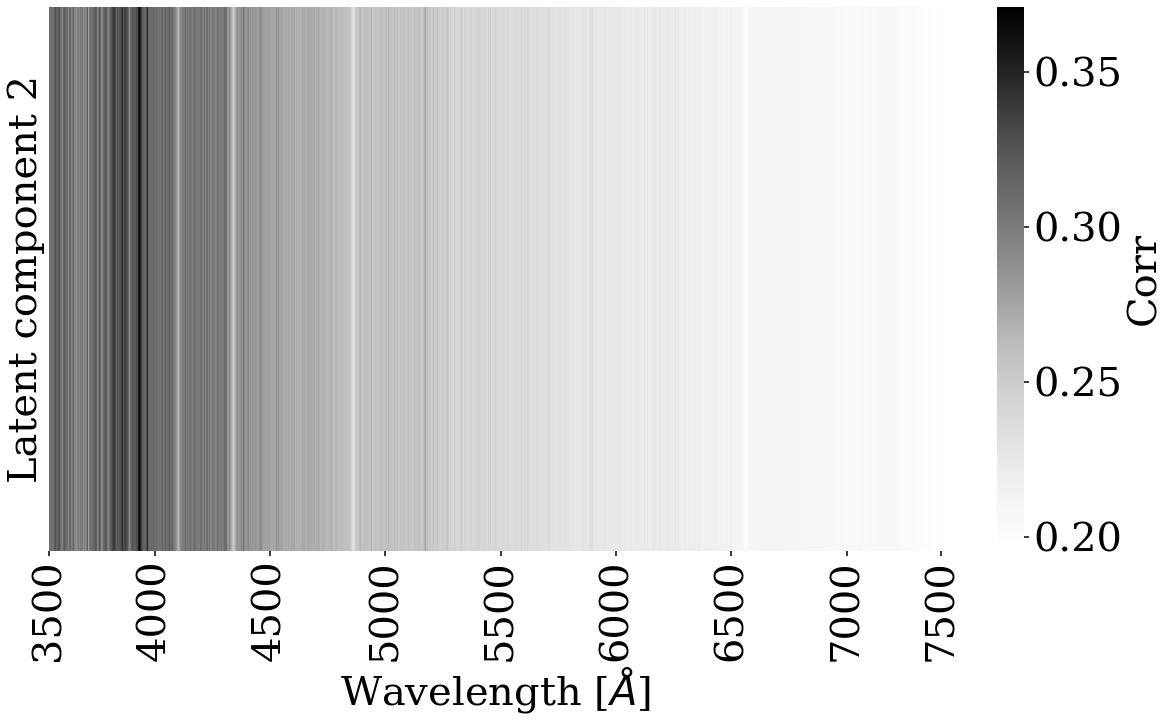

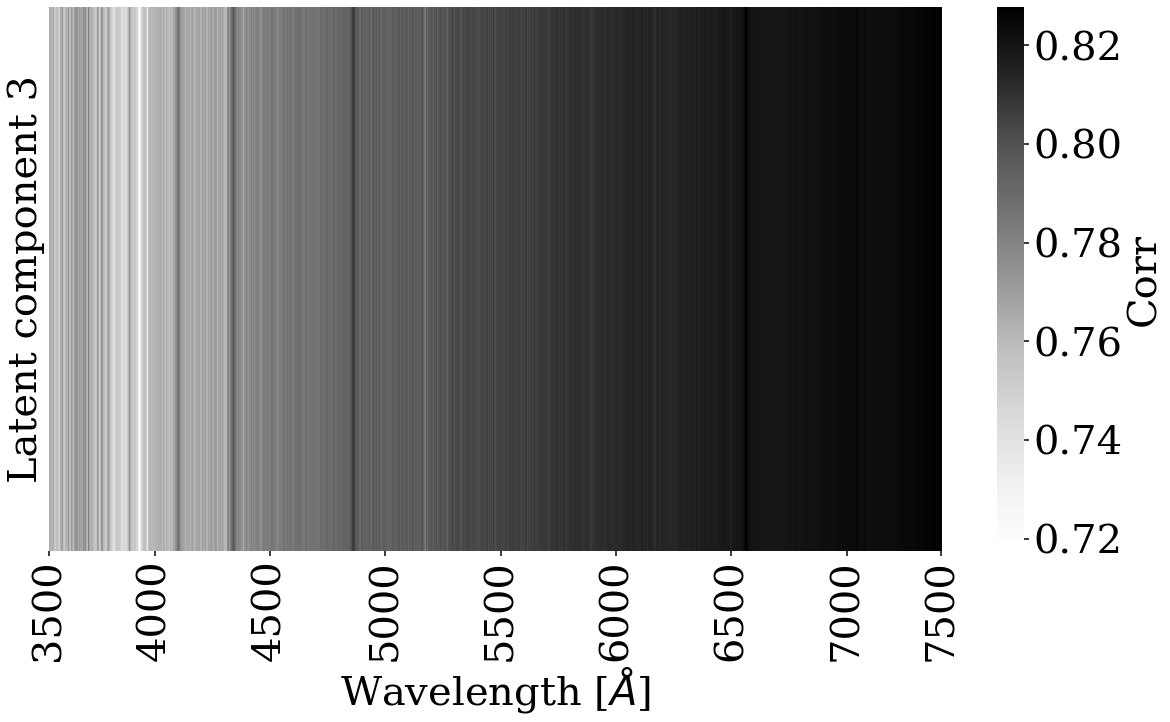

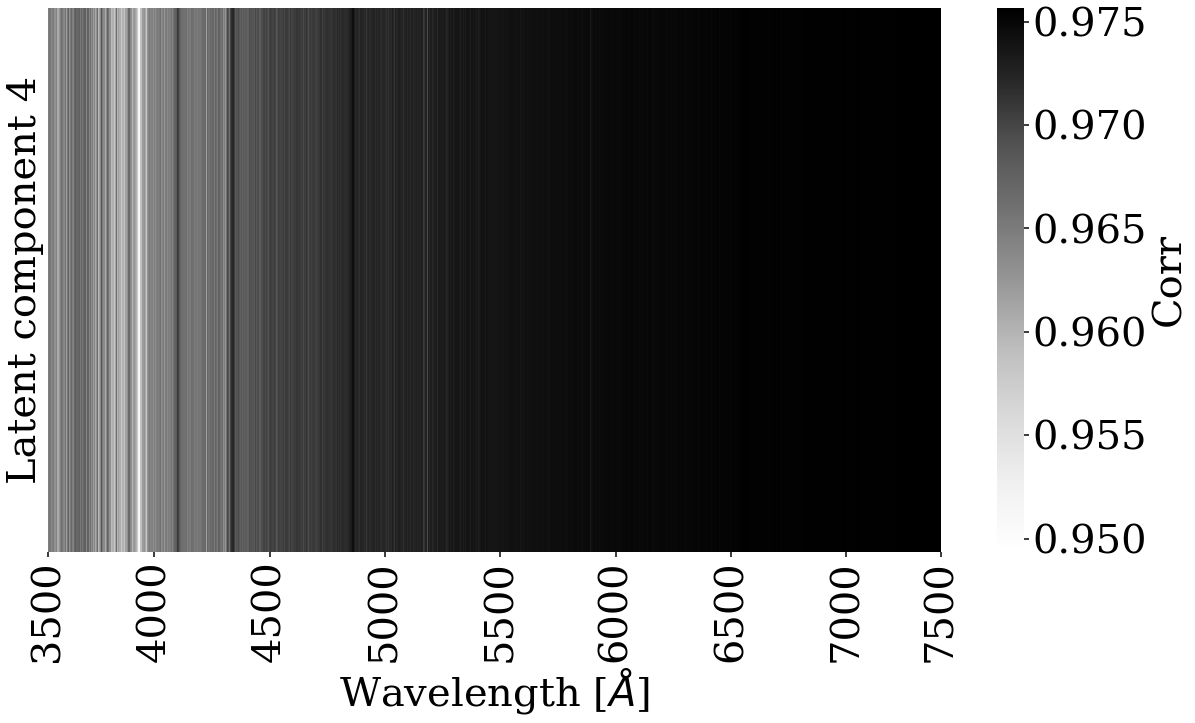

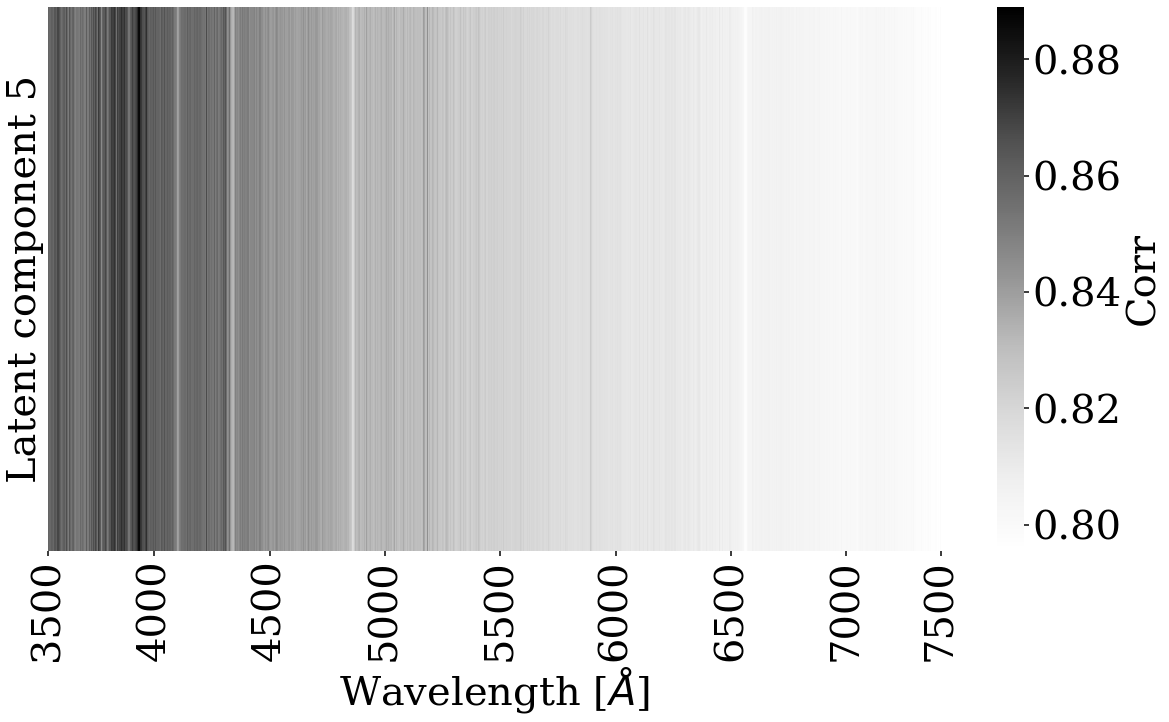

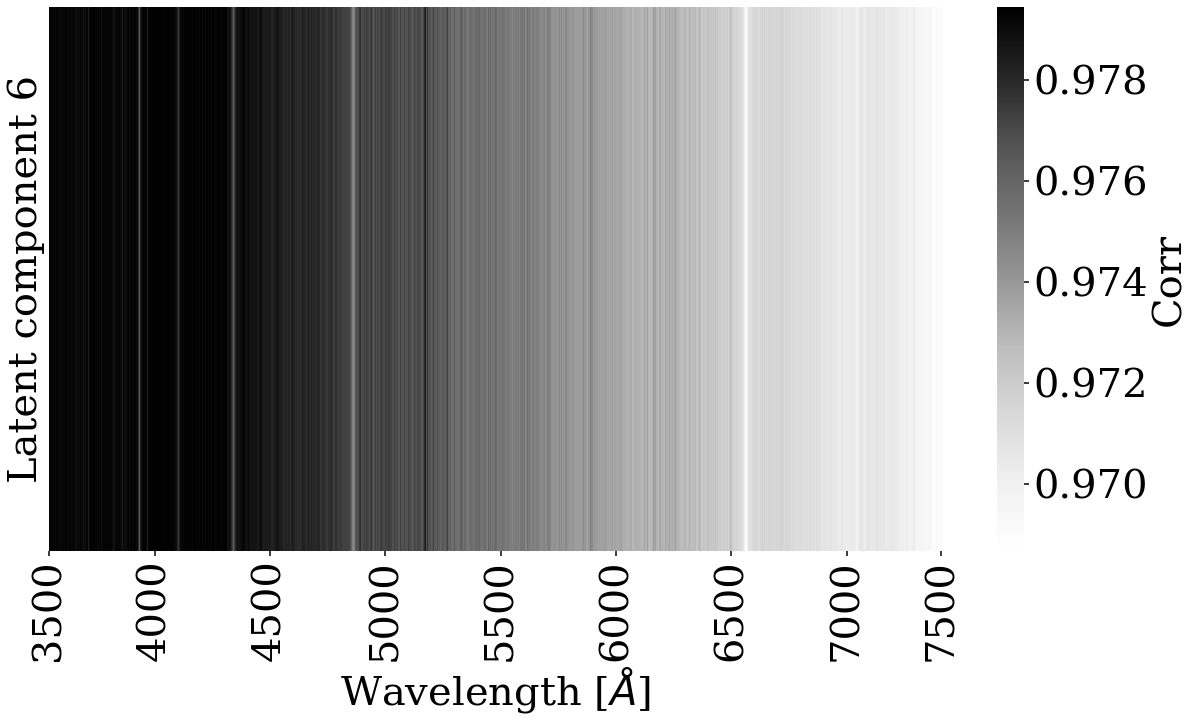

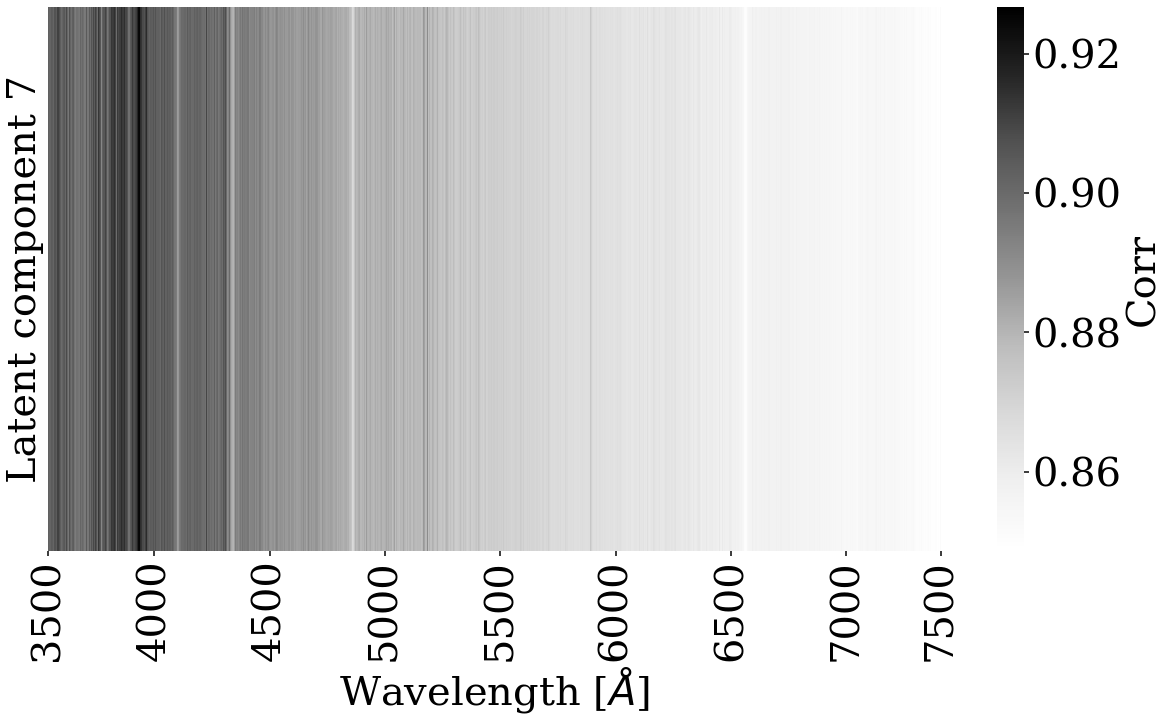

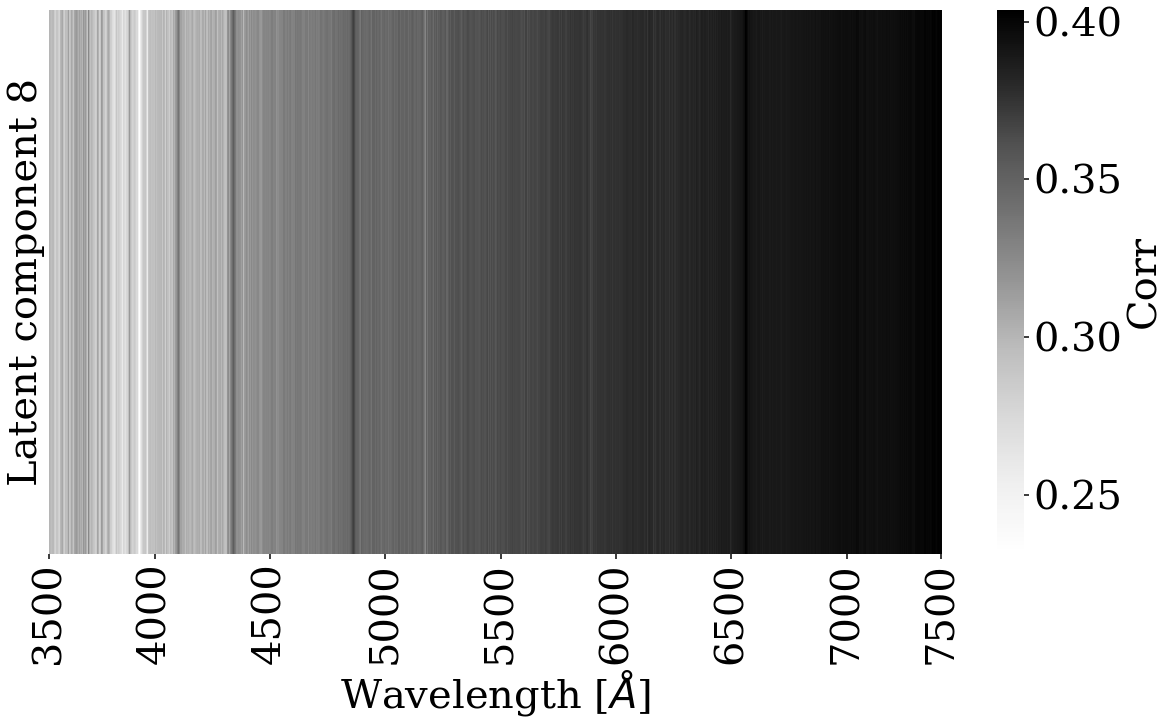

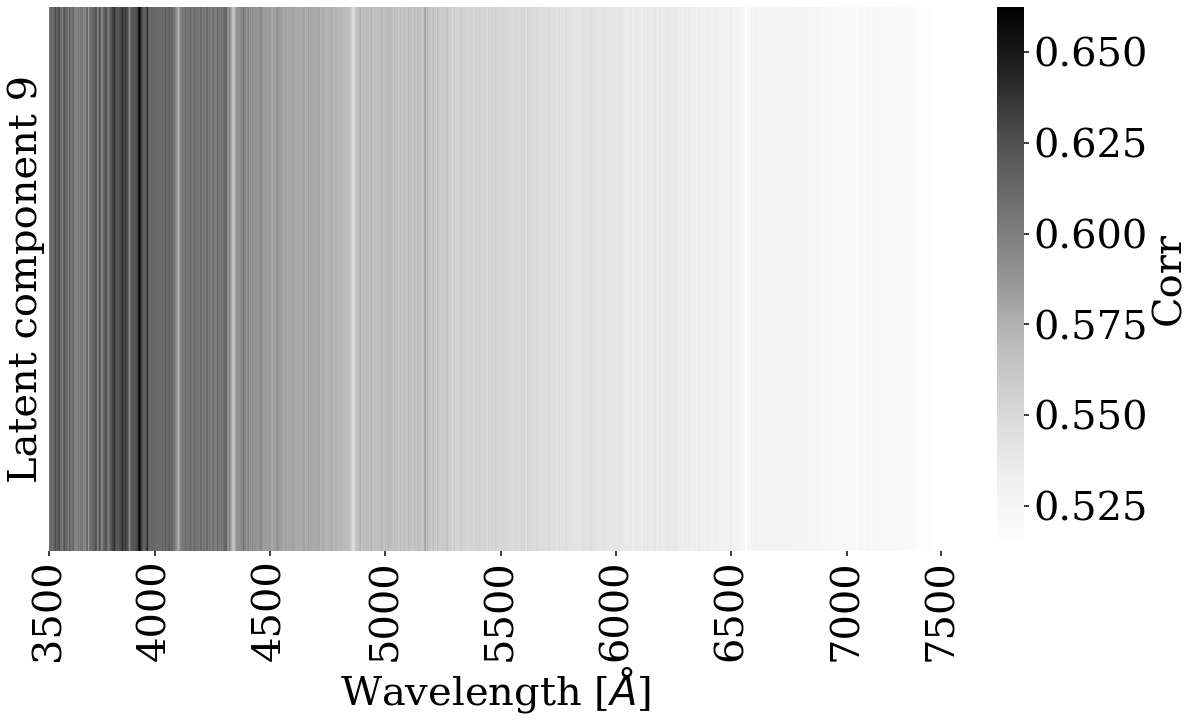

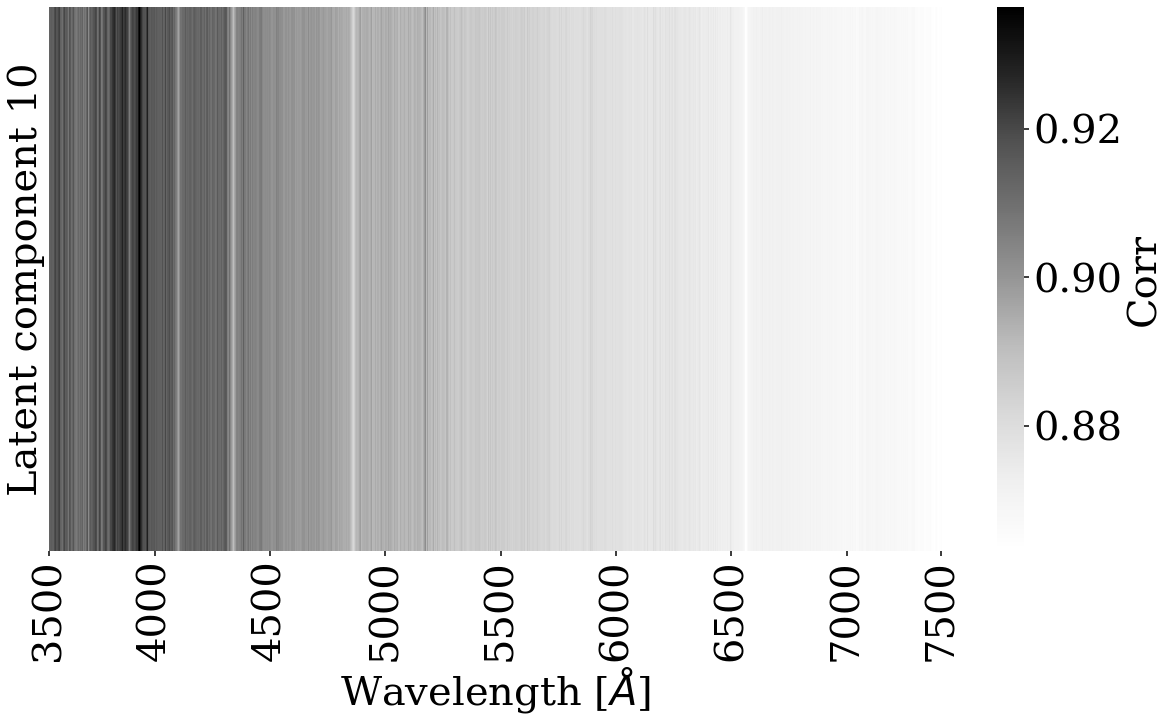

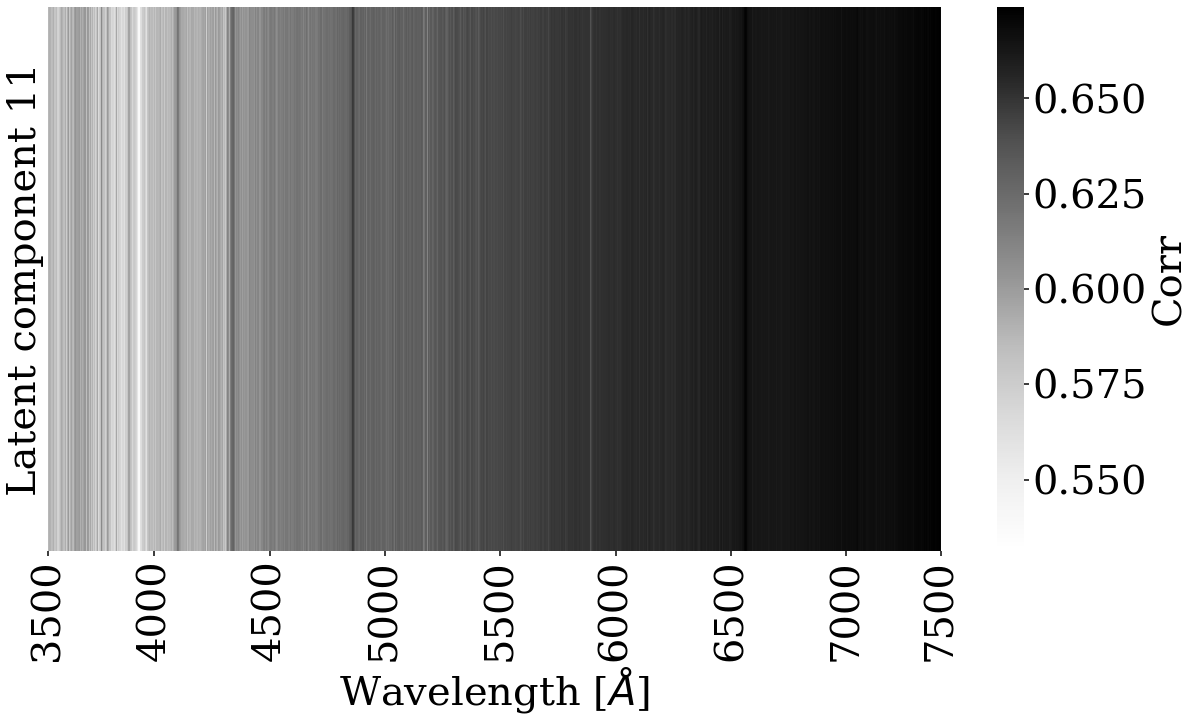

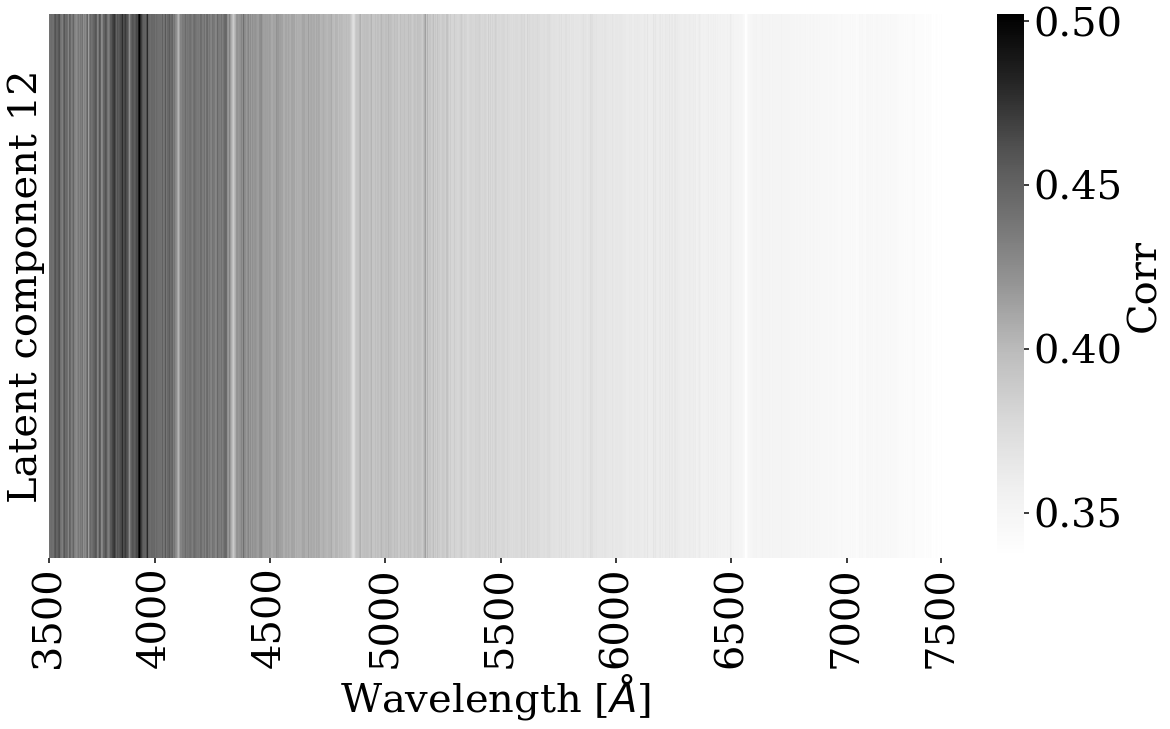

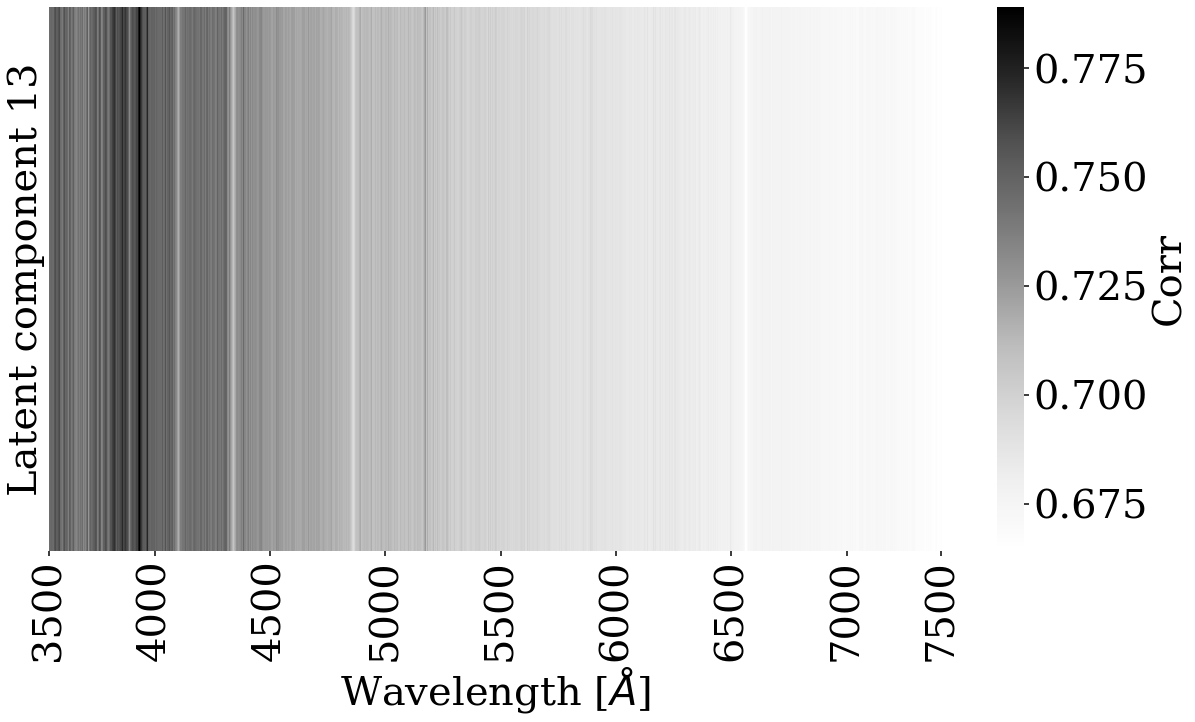

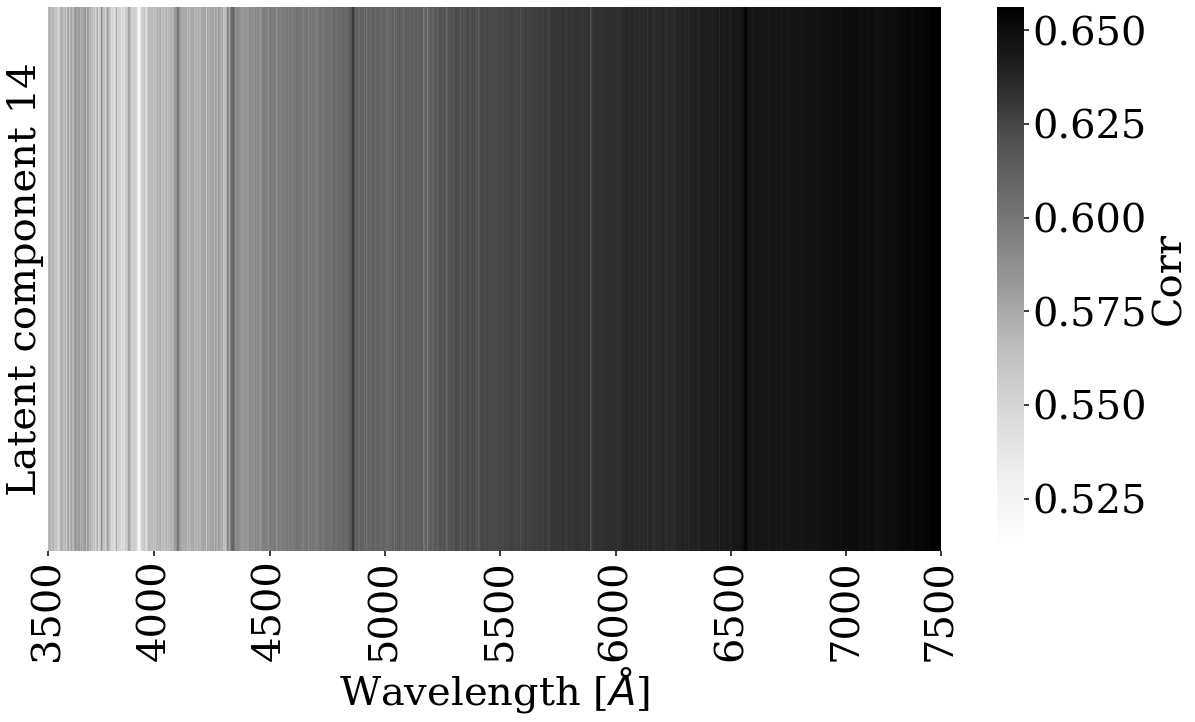

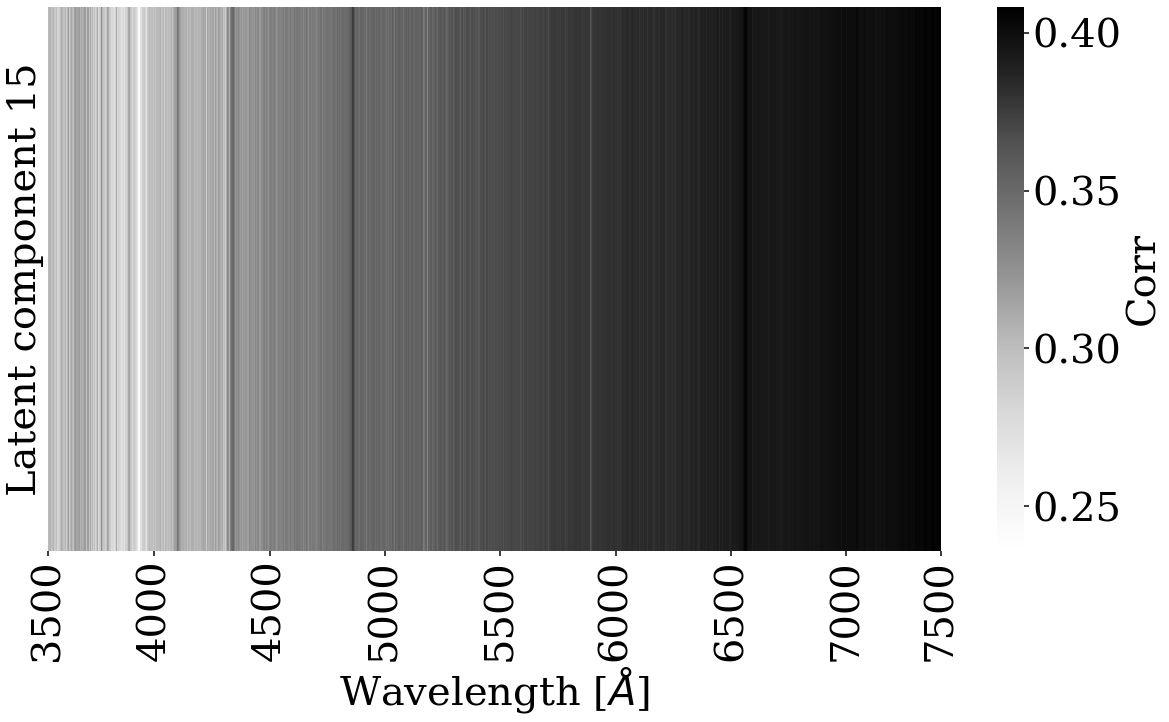

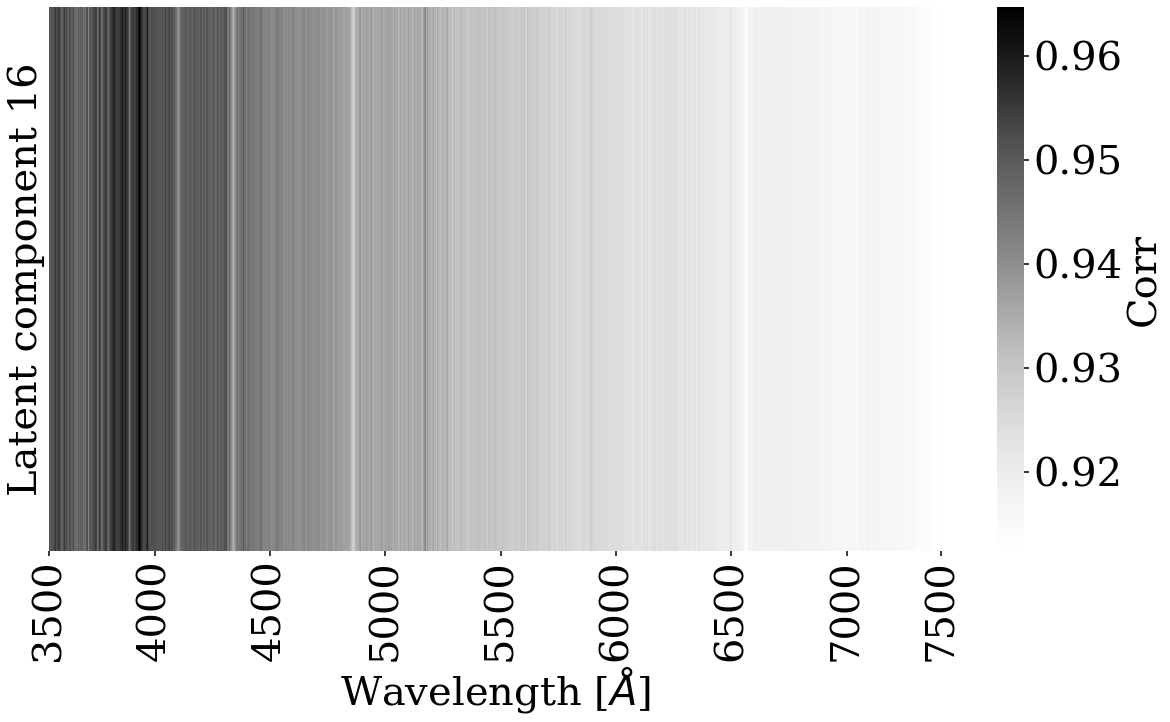

"\ncorr_map=np.corrcoef(latents,x_test_short,rowvar=False)\ncorr_map_imp=corr_map[:16,16:]\n\nfor i in range(16):\n    component_map=corr_map_imp[i,:]\n    component_map=np.reshape(component_map,(1,43))\n    #doesnt matter the sign of the correlation\n    plt.figure(figsize=(20,10))\n    sns.heatmap(np.abs(component_map), cmap='Greys',vmin=np.min(np.abs(component_map)), vmax=np.max(np.abs(component_map)),xticklabels=[],                yticklabels=[],cbar_kws={'label': 'Corr'})\n    plt.xlabel('Spectral components')\n    plt.ylabel('Latent component '+str(i+1))\n    #plt.savefig('corr_spectra_allpos.png')\n    plt.show()\n\n\n"

In [17]:
#the same but component by component to see better the colorbar



# correlation between latents and spectrum

import matplotlib

x_test_short=np.zeros((1000,43))


for i in range(43):
    x_test_short[:,i]=np.mean(x_test[:,i*100:(i+1)*100],axis=1)

color=['tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


plt.figure(figsize=(20,10))
#plt.xticks(np.arange(4300)[::200],labels=wave[::200],rotation=45)
plt.axvline( 6564.61,label='H$\\alpha$',lw=4,c=color[0])
plt.axvline(  4862.68,label='H$\\beta$',lw=4,c=color[1])
plt.axvline(4341.68,label='H$\\gamma$',lw=4,c=color[2])
plt.axvline(4102.89,label='H$\\delta$',lw=4,c=color[3])
plt.axvline(3727.092,label='OII',lw=4,c=color[4])
#plt.axvline(3729.875,lw=4,c=color[5]) #label='OII'
plt.axvline(5895.6,label='Na',lw=4,c=color[6])



plt.plot(wave,x_test[100,:]) #real spectra
#plt.plot(wave[::100],x_test_short[100,:],label='Low resolution') #low resolution spectra
plt.xlabel('Wavelength [$\\AA$]')
plt.ylabel('Flux')
#plt.grid()

plt.legend(loc='upper right',fontsize=30)
#plt.savefig('spectra_example_non_par.png')
plt.show()





corr_map=np.corrcoef(latents,x_test,rowvar=False)
corr_map_imp=corr_map[:16,16:]

xlabels=np.arange(3500,8000,500)
xticks=[]

for i in xlabels:
    xticks.append(np.argmin(np.abs(wave-i)))


for i in range(16):
    component_map=corr_map_imp[i,:]
    component_map=np.reshape(component_map,(1,4300))
    #doesnt matter the sign of the correlation
    plt.figure(figsize=(20,10))
    ax=sns.heatmap(np.abs(component_map), cmap='Greys',vmin=np.min(np.abs(component_map)), vmax=np.max(np.abs(component_map)),\
                yticklabels=[], cbar_kws={'label': 'Corr'})
    ax.set_xticks(ticks=xticks)
    ax.set_xticklabels(xlabels)
    plt.xlabel('Wavelength [$\\AA$]')
    plt.ylabel('Latent component '+str(i+1))
    #plt.savefig('corr_spectra_allpos_non_par.png')
    plt.show()
    


    
"""
corr_map=np.corrcoef(latents,x_test_short,rowvar=False)
corr_map_imp=corr_map[:16,16:]

for i in range(16):
    component_map=corr_map_imp[i,:]
    component_map=np.reshape(component_map,(1,43))
    #doesnt matter the sign of the correlation
    plt.figure(figsize=(20,10))
    sns.heatmap(np.abs(component_map), cmap='Greys',vmin=np.min(np.abs(component_map)), vmax=np.max(np.abs(component_map)),xticklabels=[],\
                yticklabels=[],cbar_kws={'label': 'Corr'})
    plt.xlabel('Spectral components')
    plt.ylabel('Latent component '+str(i+1))
    #plt.savefig('corr_spectra_allpos.png')
    plt.show()


"""




In [53]:
print(np.max(wave),np.min(wave))

7409.6 3540.5


In [41]:
"""
#Corner plot takes too long
import corner
fig = corner.corner(np.concatenate([latents, x_test_short], axis=1), 
                 labels=np.concatenate([col_lat,col_spec]),
                 label_kwargs={'fontsize': 25},
                 color='C0')
"""

"\n#Corner plot takes too long\nimport corner\nfig = corner.corner(np.concatenate([latents, x_test_short], axis=1), \n                 labels=np.concatenate([col_lat,col_spec]),\n                 label_kwargs={'fontsize': 25},\n                 color='C0')\n"